In [278]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import xlrd
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from brokenaxes import brokenaxes

# Figure 1: Lipids on Interface

In [2]:
sym_intlength = pd.read_csv("Interface_Length_Data.txt",sep="  ",header=None,dtype=float)
sym_intlength.columns=["Rho_Value","Sym_IntLength","Sym_IntError"]
asym_intlength = pd.read_csv("Asym_Interface_Length_Data.txt",sep="  ",header=None,dtype=float)
asym_intlength.columns=["Rho_Value","ASym_IntLength","ASym_IntError"]

/Users/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


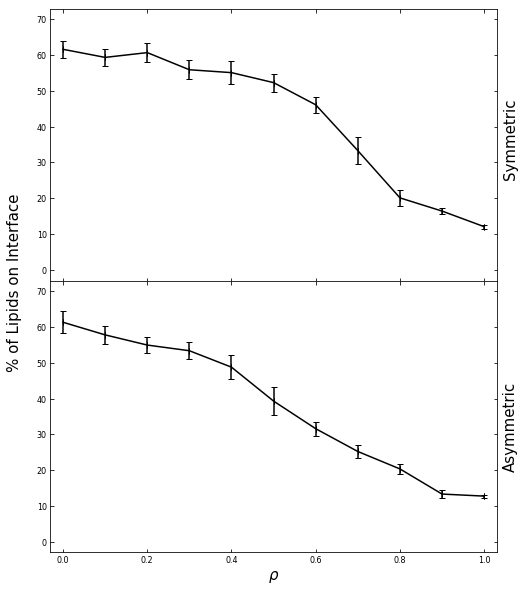

In [236]:
fig,(sym,asym)= plt.subplots(nrows=2,sharey=True, sharex=True, figsize=(8,10))

sym.errorbar(sym_intlength.Rho_Value,sym_intlength.Sym_IntLength*100,xerr=0,yerr=sym_intlength.Sym_IntError*100,
             capsize=3,capthick=1,barsabove=True,color='black')

asym.errorbar(asym_intlength.Rho_Value,asym_intlength.ASym_IntLength*100,xerr=0,yerr=asym_intlength.ASym_IntError*100,
            capsize=3,capthick=1,barsabove=True,color='black')
sym.tick_params(axis='x',direction='in',top=True,bottom=True)
sym.tick_params(axis='y',direction='in',left=True,right=True)
asym.tick_params(axis='x',direction='in',top=True,bottom=True)
asym.tick_params(axis='y',direction='in',left=True,right=True)


plt.gcf().text(.91,.7,"Symmetric", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Asymmetric", va='center',fontsize=15,rotation='vertical')

plt.xlim([-.03,1.03])
plt.ylim([-3,73])

plt.xlabel(r'$\rho$',fontsize=15)
plt.gcf().text(0.05,0.5,"% of Lipids on Interface", va='center',fontsize=15,rotation='vertical')
fig.subplots_adjust(hspace=0)
plt.savefig("Figure_1:%LiponInterface.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

# Figure 2: Symmetric Registration

In [4]:
sym_fracreg = pd.read_csv("Frac-Reg-Copy1.txt",sep=",",header=None,dtype=float)
sym_fracreg.columns=["Rho_Value","FracReg","Sym_FracRegError"]

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


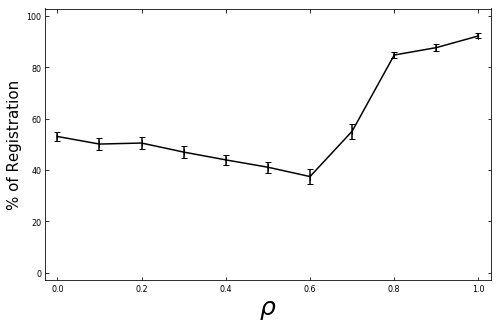

In [240]:
fig,frac_reg = plt.subplots(1,sharey=True, sharex=True, figsize=(8,5))

frac_reg.errorbar(sym_fracreg.Rho_Value,
             sym_fracreg.FracReg*100,xerr=0,
             yerr=sym_fracreg.Sym_FracRegError*100,
             capsize=3,capthick=1,barsabove=True,color='black')

frac_reg.tick_params(axis='x',direction='in',top=True,bottom=True)
frac_reg.tick_params(axis='y',direction='in',left=True,right=True)
frac_reg.tick_params(axis='x',direction='in',top=True,bottom=True)
frac_reg.tick_params(axis='y',direction='in',left=True,right=True)

plt.xlim([-.03,1.03])
plt.ylim([-3,103])
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.xlabel(r'$\rho$',fontsize=25)
plt.ylabel("% of Registration",fontsize=15)
plt.savefig("Figure_2:%LipRegistration.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

# Figure 3: Cholesterol

In [6]:
symChol_phase= pd.read_csv("CholPhase-Copy1.txt",sep=",",header=None,dtype=float)
symChol_phase.columns=["Rho_Value","lo_avg","lo_std","ld_avg","ld_std","total"]

In [7]:
asymChol_phase= pd.read_csv("ACholPhase-Copy1.txt",sep=",",header=None,dtype=float)
asymChol_phase.columns=["Rho_Value","lo_avg","lo_std","ld_avg","ld_std","total"]

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


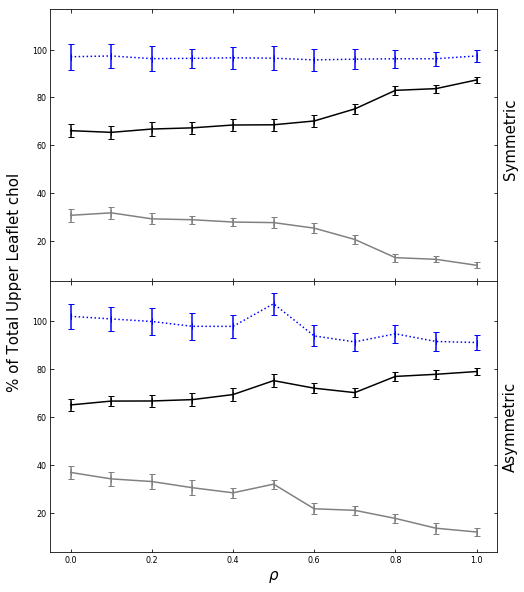

In [242]:
fig, (SymChol,AsymChol) = plt.subplots(nrows=2,sharey=True, sharex=True, figsize=(8,10))

SymChol.errorbar(symChol_phase.Rho_Value,
                 symChol_phase.lo_avg/symChol_phase.total*100,xerr=0,
                 yerr=symChol_phase.lo_std/symChol_phase.total*100,
                 capsize=3,capthick=1,barsabove=True,color='black')
SymChol.errorbar(symChol_phase.Rho_Value,
                 symChol_phase.ld_avg/symChol_phase.total*100,xerr=0,
                 yerr=symChol_phase.ld_std/symChol_phase.total*100,
                 capsize=3,capthick=1,barsabove=True,color='grey')
SymChol.errorbar(asymChol_phase.Rho_Value,100*(symChol_phase.ld_avg/symChol_phase.total + symChol_phase.lo_avg/symChol_phase.total),
                 xerr=0,yerr=100*(symChol_phase.ld_std/symChol_phase.total + symChol_phase.lo_std/symChol_phase.total)
                 ,capsize=3,capthick=1,barsabove=True,color='blue',linestyle=':')

AsymChol.errorbar(asymChol_phase.Rho_Value,
                 asymChol_phase.lo_avg/asymChol_phase.total*100,xerr=0,
                 yerr=asymChol_phase.lo_std/asymChol_phase.total*100,
                 capsize=3,capthick=1,barsabove=True,color='black')
AsymChol.errorbar(asymChol_phase.Rho_Value,
                 asymChol_phase.ld_avg/asymChol_phase.total*100,xerr=0,
                 yerr=asymChol_phase.ld_std/asymChol_phase.total*100,
                 capsize=3,capthick=1,barsabove=True,color='grey')
AsymChol.errorbar(asymChol_phase.Rho_Value,100*(asymChol_phase.ld_avg/asymChol_phase.total + asymChol_phase.lo_avg/asymChol_phase.total),
                 xerr=0,yerr=100*(asymChol_phase.lo_std/asymChol_phase.total + asymChol_phase.ld_std/asymChol_phase.total),
                  capsize=3,capthick=1,barsabove=True,color='blue',linestyle=':')

SymChol.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
SymChol.tick_params(axis='y',direction='in',left=True,right=True)
AsymChol.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
AsymChol.tick_params(axis='y',direction='in',left=True,right=True)


fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.xlabel(r'$\rho$',fontsize=15)
plt.gcf().text(0.05,0.5,"% of Total Upper Leaflet chol", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Symmetric", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Asymmetric", va='center',fontsize=15,rotation='vertical')
plt.savefig("Figure_3:%CholperLeaflet.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

## Figure 4: DBPC Order Parameter

In [279]:
sym_SN1_AVG= pd.read_csv("Symmetric-DBPC-OP-AVG-Copy1.txt",sep=",",header=None,dtype=float)
sym_SN1_STD= pd.read_csv("Symmetric-DBPC-OP-STD-Copy1.txt",sep=",",header=None,dtype=float)
asym_SN1_AVG= pd.read_csv("aSymmetric-DBPC-OP-AVG.txt",sep=",",header=None,dtype=float)
asym_SN1_STD= pd.read_csv("aSymmetric-DBPC-OP-STD.txt",sep=",",header=None,dtype=float)

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


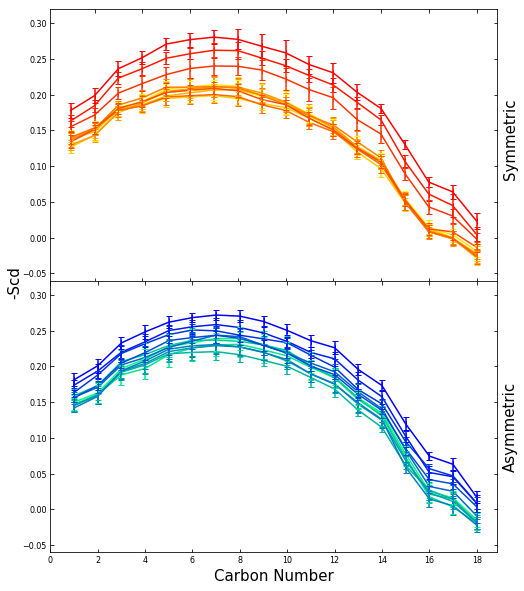

In [280]:
cmap = plt.get_cmap('winter_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]

fig, (DBPC_OP_SYM,DBPC_OP_ASYM) = plt.subplots(nrows=2,sharey=True,sharex=True,figsize=(8,10))


for row_index,row in asym_SN1_AVG.iterrows():
    DBPC_OP_ASYM.errorbar(np.arange(1,19,1),
                 -asym_SN1_AVG.iloc[row_index][1:19],xerr=0,
                 yerr=asym_SN1_STD.iloc[row_index][1:19],
                 capsize=3,capthick=1,barsabove=True,color=colors[row_index])

cmap = plt.get_cmap('autumn_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
for row_index,row in sym_SN1_AVG.iterrows():
    DBPC_OP_SYM.errorbar(np.arange(1,19,1),
                 -sym_SN1_AVG.iloc[row_index][1:19],xerr=0,
                 yerr=sym_SN1_STD.iloc[row_index][1:19],
                 capsize=3,capthick=1,barsabove=True,color=colors[row_index])

fig.subplots_adjust(wspace=0)
plt.xticks(np.arange(0,19,2))
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

DBPC_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True)
DBPC_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
DBPC_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True)
DBPC_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)

plt.xlabel('Carbon Number',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Symmetric", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Asymmetric", va='center',fontsize=15,rotation='vertical')
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.ylim([-.06,.32])
#plt.gca().invert_yaxis()
plt.savefig("Figure_4:DBPCorderparam.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

# Figure 5: POPE Order Parameter

In [281]:
pope_LO_AVG= pd.read_csv("aSymmetric-POPE-OP-LO-AVG.txt",sep=",",header=None,dtype=float)
pope_LO_STD= pd.read_csv("aSymmetric-POPE-OP-LO-STD.txt",sep=",",header=None,dtype=float)
pope_LD_AVG= pd.read_csv("aSymmetric-POPE-OP-LD-AVG.txt",sep=",",header=None,dtype=float)
pope_LD_STD= pd.read_csv("aSymmetric-POPE-OP-LD-STD.txt",sep=",",header=None,dtype=float)

0     0.000000
1    -0.175161
2    -0.205894
3    -0.221153
4    -0.234828
5    -0.239789
6    -0.241970
7    -0.239194
8    -0.234188
9    -0.217346
10   -0.198363
11   -0.172760
12   -0.145955
13   -0.111097
14   -0.074120
Name: 0, dtype: float64
0     0.100000
1    -0.170980
2    -0.196832
3    -0.213547
4    -0.226101
5    -0.233780
6    -0.237427
7    -0.233208
8    -0.221760
9    -0.216253
10   -0.202406
11   -0.177454
12   -0.152302
13   -0.115377
14   -0.071684
Name: 1, dtype: float64
0     0.100000
1    -0.178440
2    -0.204985
3    -0.218847
4    -0.227730
5    -0.238322
6    -0.244561
7    -0.240192
8    -0.230348
9    -0.220193
10   -0.207466
11   -0.184248
12   -0.156272
13   -0.117401
14   -0.070597
Name: 2, dtype: float64
0     0.300000
1    -0.182882
2    -0.214064
3    -0.231610
4    -0.248226
5    -0.252257
6    -0.253831
7    -0.248743
8    -0.245166
9    -0.231867
10   -0.216967
11   -0.196196
12   -0.168526
13   -0.129335
14   -0.086269
Name: 3, dtype: float64
0   

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


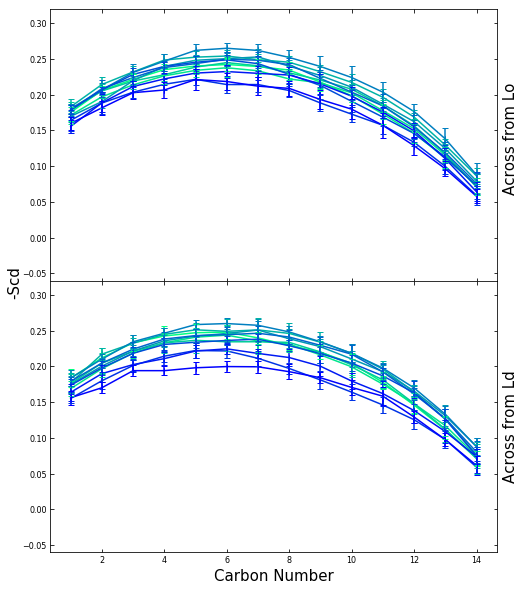

In [371]:
cmap = plt.get_cmap('winter_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors
fig, (POPE_OP_SYM, POPE_OP_ASYM) = plt.subplots(nrows=2 ,sharey=True, sharex=True, figsize=(8,10))

for row_index,row in pope_LO_AVG.iterrows():
        POPE_OP_SYM.errorbar(np.arange(1,15,1),
                     -pope_LO_AVG.iloc[row_index][1:],xerr=0,
                     yerr=pope_LO_STD.iloc[row_index][1:],
                     capsize=3,capthick=1,barsabove=True,color=colors[row_index])

for row_index,row in pope_LD_AVG.iterrows():
        POPE_OP_ASYM.errorbar(np.arange(1,15,1),
                    -pope_LD_AVG.iloc[row_index][1:],xerr=0,
                     yerr=pope_LD_STD.iloc[row_index][1:],
                     capsize=3,capthick=1,barsabove=True,color=colors[row_index])
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

plt.ylim([-.06,.32])

POPE_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
POPE_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)



plt.xlabel('Carbon Number',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Across from Lo", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Across from Ld", va='center',fontsize=15,rotation='vertical')


plt.rc('axes', labelsize=8)
plt.savefig("POPEorderparam_AcrossLOLD.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

# Supplemental

# Carbon6 DBPC

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


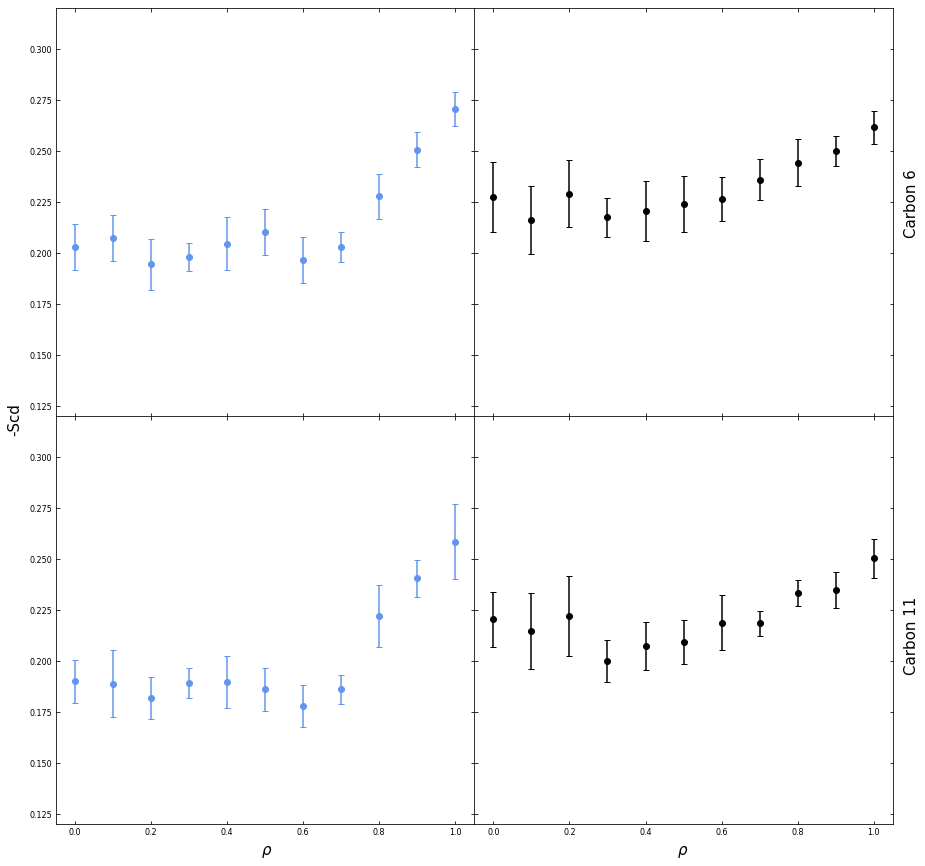

In [255]:
rho=np.arange(0,1.1,.1)

cmap = plt.get_cmap('winter_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]

fig, (C6,C11) = plt.subplots(nrows=2,ncols=2,sharey=True,sharex=False,figsize=(15,15))

C6[0].errorbar(rho,-sym_SN1_AVG.iloc[:][5],xerr=None,yerr=sym_SN1_STD.iloc[:][5],ls='None',marker='o',
               color='cornflowerblue', capsize=3,capthick=1,barsabove=True)
C6[1].errorbar(rho,-asym_SN1_AVG.iloc[:][5],xerr=None,yerr=asym_SN1_STD.iloc[:][5],ls='None',marker='o',
               color='black',capsize=3,capthick=1,barsabove=True)
C11[0].errorbar(rho,-sym_SN1_AVG.iloc[:][10],xerr=None,yerr=sym_SN1_STD.iloc[:][10],ls='None',marker='o',
                color='cornflowerblue', capsize=3,capthick=1,barsabove=True)
C11[1].errorbar(rho,-asym_SN1_AVG.iloc[:][10],xerr=None,yerr=asym_SN1_STD.iloc[:][10],ls='None',marker='o',
                color='black', capsize=3,capthick=1,barsabove=True)



fig.subplots_adjust(wspace=0)
plt.xticks(np.arange(0,1.1,.2))
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

C6[0].tick_params(axis='x',direction='in',top=True,bottom=True)
C6[0].tick_params(axis='y',direction='in',left=True,right=True)
C6[1].tick_params(axis='x',direction='in',top=True,bottom=True)
C6[1].tick_params(axis='y',direction='in',left=True,right=True)

C11[0].tick_params(axis='x',direction='in',top=True,bottom=True)
C11[0].tick_params(axis='y',direction='in',left=True,right=True)
C11[1].tick_params(axis='x',direction='in',top=True,bottom=True)
C11[1].tick_params(axis='y',direction='in',left=True,right=True)


plt.gcf().text(0.315,0.1,r'$\rho$', va='center',fontsize=15,rotation='horizontal')
plt.gcf().text(0.70,0.1,r'$\rho$', va='center',fontsize=15,rotation='horizontal')

plt.gcf().text(0.08,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Carbon 6", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Carbon 11", va='center',fontsize=15,rotation='vertical')
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.ylim([.12,.32])

#plt.gca().invert_yaxis()
plt.savefig("Figure_8:DBPCorderparam_Carbon6.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

# DBPC Rho0,1 OP

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


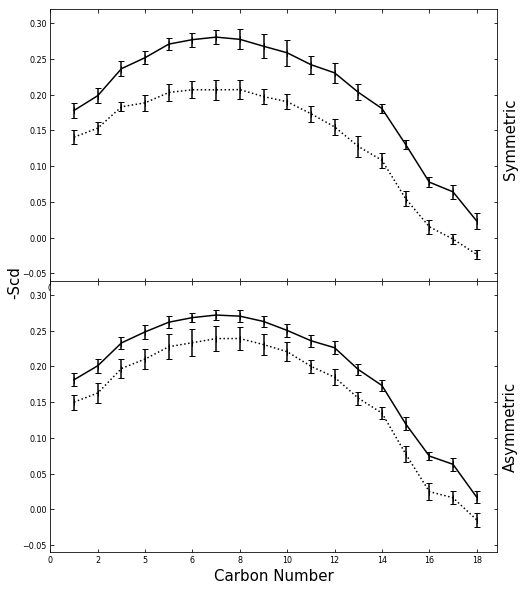

In [351]:

fig, (POPE_OP_SYM, POPE_OP_ASYM) = plt.subplots(nrows=2 ,sharey=True, sharex=False, figsize=(8,10))

POPE_OP_SYM.errorbar(np.arange(1,19,1),
             -sym_SN1_AVG.iloc[0][1:19],xerr=0,
             yerr=sym_SN1_STD.iloc[0][1:19],
             capsize=3,capthick=1,barsabove=True,color='black',linestyle=":")
POPE_OP_SYM.errorbar(np.arange(1,19,1),
             -sym_SN1_AVG.iloc[10][1:19],xerr=0,
             yerr=sym_SN1_STD.iloc[10][1:19],
             capsize=3,capthick=1,barsabove=True,color='black')

POPE_OP_ASYM.errorbar(np.arange(1,19,1),
             -asym_SN1_AVG.iloc[0][1:19],xerr=0,
             yerr=asym_SN1_STD.iloc[0][1:19],
             capsize=3,capthick=1,barsabove=True,color='black',linestyle=":")
POPE_OP_ASYM.errorbar(np.arange(1,19,1),
             -asym_SN1_AVG.iloc[10][1:19],xerr=0,
             yerr=asym_SN1_STD.iloc[10][1:19],
             capsize=3,capthick=1,barsabove=True,color='black')

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
#plt.xticks(np.arange(0,19,2))

plt.ylim([-.06,.32])

POPE_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
POPE_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)


plt.setp(POPE_OP_ASYM, xticks=np.arange(0,20,2), xticklabels=['0', '2','5','6','8','10','12','14','16','18'])
plt.setp(POPE_OP_SYM, xticks=np.arange(0,20,2))


plt.xlabel('Carbon Number',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Symmetric", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Asymmetric", va='center',fontsize=15,rotation='vertical')


plt.rc('axes', labelsize=8)
plt.savefig("DBPCOP_rho0,1", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

# DBPC OP Rho=1, Sym v Asym

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


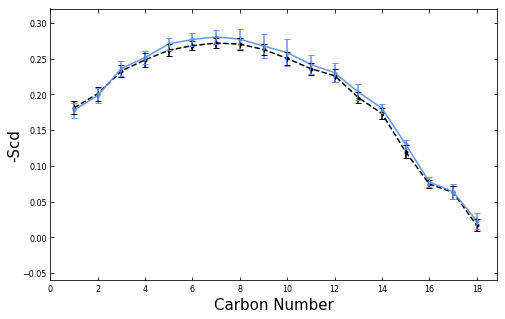

In [214]:
fig, (sym) = plt.subplots(nrows=1,sharey=True,sharex=False,figsize=(8,5))

sym.errorbar(np.arange(1,19,1),
             -asym_SN1_AVG.iloc[10][1:19],xerr=0,
             yerr=asym_SN1_STD.iloc[10][1:19],
             capsize=3,capthick=1,barsabove=True,color='black',marker='.',linestyle='--')
sym.errorbar(np.arange(1,19,1),
             -sym_SN1_AVG.iloc[10][1:19],xerr=0,
             yerr=sym_SN1_STD.iloc[10][1:19],
             capsize=3,capthick=1,barsabove=True,color='cornflowerblue',marker='.')

fig.subplots_adjust(wspace=0)
plt.xticks(np.arange(0,19,2))
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
plt.xlabel('Carbon Number',fontsize=15)
sym.tick_params(axis='x',direction='in',top=True,bottom=True)
sym.tick_params(axis='y',direction='in',left=True,right=True)

plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.ylim([-.06,.32])

#plt.gca().invert_yaxis()
plt.savefig("Figure_8:DBPCorderparam_rho=1.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

# Carbon6 Across Lo and Ld 

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


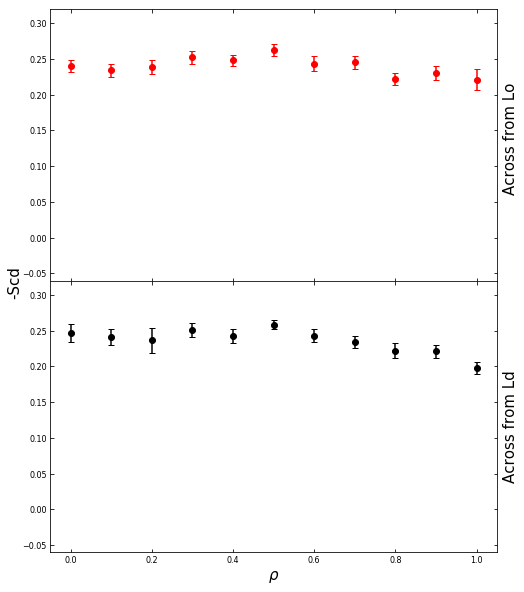

In [256]:
rho=np.arange(0,1.1,.1)

fig, (POPE_OP_SYM, POPE_OP_ASYM) = plt.subplots(nrows=2 ,sharey=True, sharex=True, figsize=(8,10))


POPE_OP_SYM.errorbar(rho,-pope_LO_AVG.iloc[:][5],xerr=None,yerr=pope_LO_STD.iloc[:][5],ls='None',marker='o',
                     color='red', capsize=3,capthick=1,barsabove=True)

POPE_OP_ASYM.errorbar(rho,-pope_LD_AVG.iloc[:][5],xerr=None,yerr=pope_LD_STD.iloc[:][5],ls='None',marker='o',
                      color='black', capsize=3,capthick=1,barsabove=True)


fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

plt.ylim([-.06,.32])

POPE_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
POPE_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)


plt.xlabel(r'$\rho$',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Across from Lo", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Across from Ld", va='center',fontsize=15,rotation='vertical')


plt.rc('axes', labelsize=8)
plt.savefig("POPEorderparam_AcrossLOLD_Carbon6.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


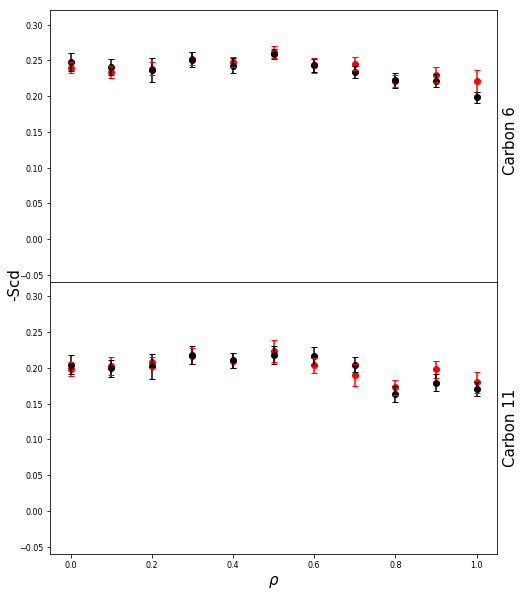

In [353]:
rho=np.arange(0,1.1,.1)

fig, (left,right) = plt.subplots(nrows=2 ,sharey=True, sharex=True, figsize=(8,10))

left.errorbar(rho,-pope_LO_AVG.iloc[:][5],xerr=None,yerr=pope_LO_STD.iloc[:][5],ls='None',marker='o'
              ,color='red',capsize=3,capthick=1,barsabove=True)
left.errorbar(rho,-pope_LD_AVG.iloc[:][5],xerr=None,yerr=pope_LD_STD.iloc[:][5],ls='None',marker='o',
              color='black',capsize=3,capthick=1,barsabove=True)

right.errorbar(rho,-pope_LO_AVG.iloc[:][10],xerr=None,yerr=pope_LO_STD.iloc[:][10],ls='None',marker='o',
               color='red',capsize=3,capthick=1,barsabove=True)
right.errorbar(rho,-pope_LD_AVG.iloc[:][10],xerr=None,yerr=pope_LD_STD.iloc[:][10],ls='None',marker='o',
               color='black',capsize=3,capthick=1,barsabove=True)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

plt.ylim([-.06,.32])

POPE_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
POPE_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)


plt.xlabel(r'$\rho$',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Carbon 6", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Carbon 11", va='center',fontsize=15,rotation='vertical')


plt.rc('axes', labelsize=8)
plt.savefig("POPEorderparam_AcrossLOLD_Carbon6,11_sameGraph.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

# POPE OP Rho0,1

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


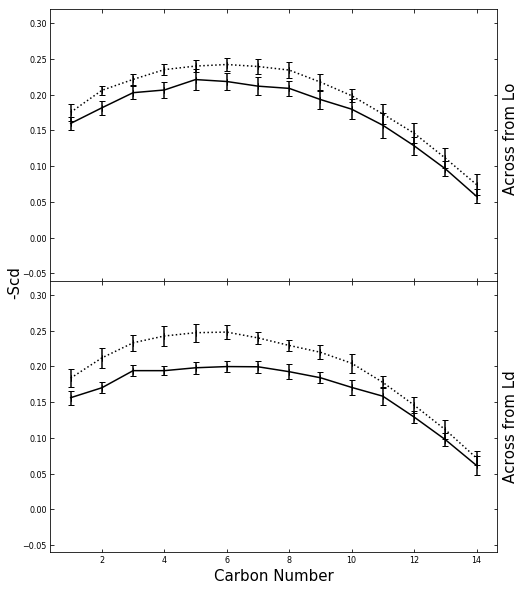

In [226]:
cmap = plt.get_cmap('winter_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors
fig, (POPE_OP_SYM, POPE_OP_ASYM) = plt.subplots(nrows=2 ,sharey=True, sharex=True, figsize=(8,10))


POPE_OP_SYM.errorbar(np.arange(1,15,1),
             -pope_LO_AVG.iloc[0][1:],xerr=0,
             yerr=pope_LO_STD.iloc[0][1:],
             capsize=3,capthick=1,barsabove=True,color='black',linestyle=':')
POPE_OP_SYM.errorbar(np.arange(1,15,1),
             -pope_LO_AVG.iloc[10][1:],xerr=0,
             yerr=pope_LO_STD.iloc[10][1:],
             capsize=3,capthick=1,barsabove=True,color='black')


POPE_OP_ASYM.errorbar(np.arange(1,15,1),
            -pope_LD_AVG.iloc[0][1:],xerr=0,
             yerr=pope_LD_STD.iloc[0][1:],
             capsize=3,capthick=1,barsabove=True,color='black',linestyle=':')

POPE_OP_ASYM.errorbar(np.arange(1,15,1),
            -pope_LD_AVG.iloc[10][1:],xerr=0,
             yerr=pope_LD_STD.iloc[10][1:],
             capsize=3,capthick=1,barsabove=True,color='black')

        
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

plt.ylim([-.06,.32])

POPE_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
POPE_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)



plt.xlabel('Carbon Number',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Across from Lo", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Across from Ld", va='center',fontsize=15,rotation='vertical')


plt.rc('axes', labelsize=8)
plt.savefig("POPEorderparam_AcrossLOLD_finalandinitial.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


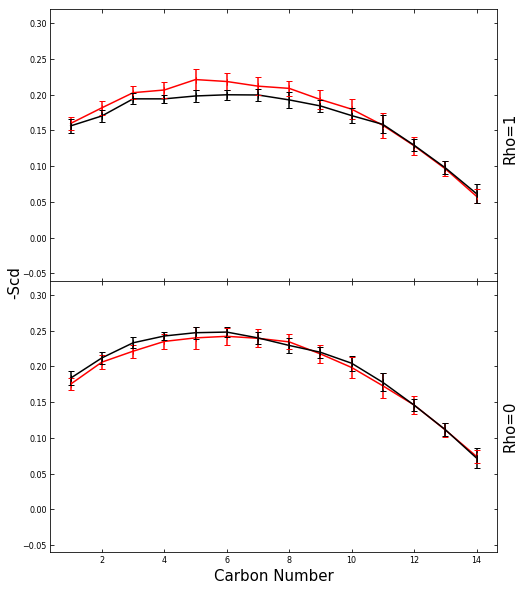

In [105]:
cmap = plt.get_cmap('winter_r')
colors = [cmap(i) for i in np.linspace(0, 1, 2)]
colors
fig, (POPE_OP_SYM, POPE_OP_ASYM) = plt.subplots(nrows=2 ,sharey=True, sharex=True, figsize=(8,10))


POPE_OP_SYM.errorbar(np.arange(1,15,1),
             -pope_LO_AVG.iloc[10][1:],xerr=0,
             yerr=pope_LO_STD.iloc[row_index][1:],
             capsize=3,capthick=1,barsabove=True,color='red')

POPE_OP_SYM.errorbar(np.arange(1,15,1),
            -pope_LD_AVG.iloc[10][1:],xerr=0,
             yerr=pope_LD_STD.iloc[row_index][1:],
             capsize=3,capthick=1,barsabove=True,color='black')


POPE_OP_ASYM.errorbar(np.arange(1,15,1),
             -pope_LO_AVG.iloc[0][1:],xerr=0,
             yerr=pope_LO_STD.iloc[row_index][1:],
             capsize=3,capthick=1,barsabove=True,color='red')

POPE_OP_ASYM.errorbar(np.arange(1,15,1),
            -pope_LD_AVG.iloc[0][1:],xerr=0,
             yerr=pope_LD_STD.iloc[row_index][1:],
             capsize=3,capthick=1,barsabove=True,color='black')

        
        
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)

plt.ylim([-.06,.32])

POPE_OP_SYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_SYM.tick_params(axis='y',direction='in',left=True,right=True)
POPE_OP_ASYM.tick_params(axis='x',direction='in',top=True,bottom=True,labelbottom=True)
POPE_OP_ASYM.tick_params(axis='y',direction='in',left=True,right=True)



plt.xlabel('Carbon Number',fontsize=15)
plt.gcf().text(0.05,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.7,"Rho=1", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.91,.3,"Rho=0", va='center',fontsize=15,rotation='vertical')


plt.rc('axes', labelsize=8)
plt.savefig("POPEorderparam_AcrossLOLD_rho1,rho0.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

# 3D contour

In [370]:
sym_SN1_AVG.iloc[0]

0     0.000000
1    -0.140453
2    -0.153013
3    -0.182851
4    -0.188423
5    -0.202857
6    -0.206704
7    -0.206546
8    -0.206898
9    -0.197142
10   -0.189937
11   -0.173231
12   -0.154796
13   -0.127489
14   -0.108080
15   -0.054474
16   -0.015128
17    0.002061
18    0.023485
19         NaN
Name: 0, dtype: float64

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


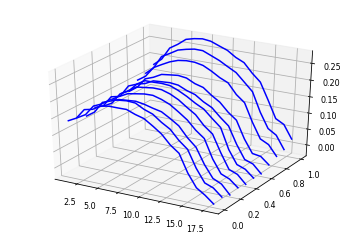

In [401]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

for row_index,row in sym_SN1_AVG.iterrows(): 
    xline = np.arange(1,19,1)
    zline = -sym_SN1_AVG.iloc[row_index][1:19]
    yline = [row_index/10]*len(xline)
    ax.plot3D(xline, yline, zline, 'blue')
plt.savefig("Sym_DBPC_3D.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


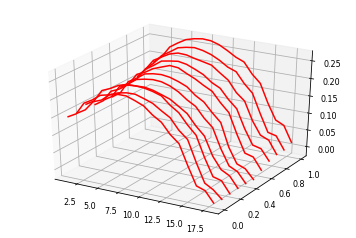

In [402]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

for row_index,row in sym_SN1_AVG.iterrows(): 
    xline = np.arange(1,19,1)
    zline = -asym_SN1_AVG.iloc[row_index][1:19]
    yline = [row_index/10]*len(xline)
    ax.plot3D(xline, yline, zline, 'red')
plt.savefig("Asym_DBPC_3D.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")#

In [65]:
pope_Curvature= pd.read_csv("POPE-Rho-one-Copy1.txt",sep=",",header=None,dtype=float)
pope_Curvature_std= pd.read_csv("POPE-Rho-one-STD-Copy1.txt",sep=",",header=None,dtype=float)

FileNotFoundError: File b'POPE-Rho-one-Copy1.txt' does not exist

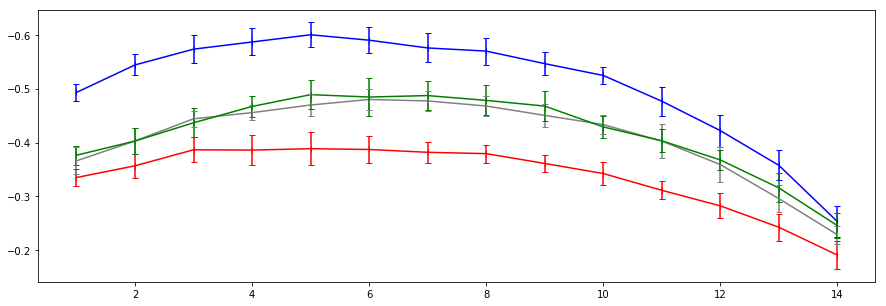

In [62]:
fig, pope_Curv = plt.subplots(1, figsize=(15,5))

pope_Curv.errorbar(np.arange(1,15,1),
                 -pope_Curvature.iloc[0][1:],xerr=0,
                 yerr=pope_Curvature_std.iloc[0][1:],
                 capsize=3,capthick=1,barsabove=True,color='blue')
pope_Curv.errorbar(np.arange(1,15,1),
                 -pope_Curvature.iloc[1][1:],xerr=0,
                 yerr=pope_Curvature_std.iloc[1][1:],
                 capsize=3,capthick=1,barsabove=True,color='red')
pope_Curv.errorbar(np.arange(1,15,1),
                 -pope_Curvature.iloc[2][1:],xerr=0,
                 yerr=pope_Curvature_std.iloc[2][1:],
                 capsize=3,capthick=1,barsabove=True,color='grey')
pope_Curv.errorbar(np.arange(1,15,1),
                 -pope_Curvature.iloc[3][1:],xerr=0,
                 yerr=pope_Curvature_std.iloc[3][1:],
                 capsize=3,capthick=1,barsabove=True,color='green')



plt.gca().invert_yaxis()

# EXTRA

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


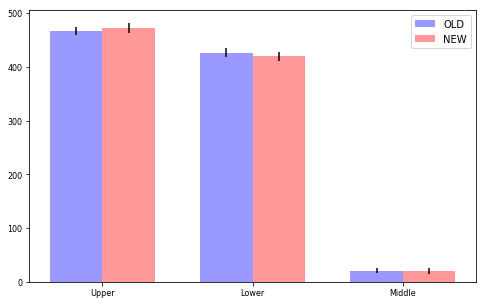

In [69]:
old_ptfive_avg=[466.0,426.2352941176471,20.761194029850746]
old_ptfive_std=[7.428086603442053,7.959673447075767,4.479104228938605]
new_ptfive_avg=[472.5217391304348,419.70588235294116,20.074626865671643]
new_ptfive_std=[9.145536165694935,8.55270652643569,4.912103336568662]

index = np.arange(3)
bar_width = 0.35
opacity = 0.4


fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.35
rects1 = ax.bar(index, old_ptfive_avg, bar_width,
                alpha=opacity, color='b',
                yerr=old_ptfive_std,label='OLD')
rects2 = ax.bar(index+bar_width, new_ptfive_avg, bar_width,
                alpha=opacity, color='r',
                yerr=new_ptfive_std,label='NEW')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Upper', 'Lower', 'Middle'))
ax.legend()



In [28]:
asym_cholper_leaflet = pd.read_csv("ASYMCholperLeaflet.txt",sep=",",header=None,dtype=float)
asym_cholper_leaflet.columns=["Rho_Value","ASym_Upper", "ASym_Upper_Err", "ASym_Lower", "ASym_Lower_Err", "ASym_Middle","ASym_Middle_Err","ASym_Upper_0","ASym_Lower_0"]

In [27]:
sym_cholper_leaflet = pd.read_csv("SYMCholperLeaflet.txt",sep=",",header=None,dtype=float)
sym_cholper_leaflet.columns=["Rho_Value","Sym_Upper", "Sym_Upper_Err", "Sym_Lower", "Sym_Lower_Err", "Sym_Middle","Sym_Middle_Err","Sym_Upper_0","Sym_Lower_0"]

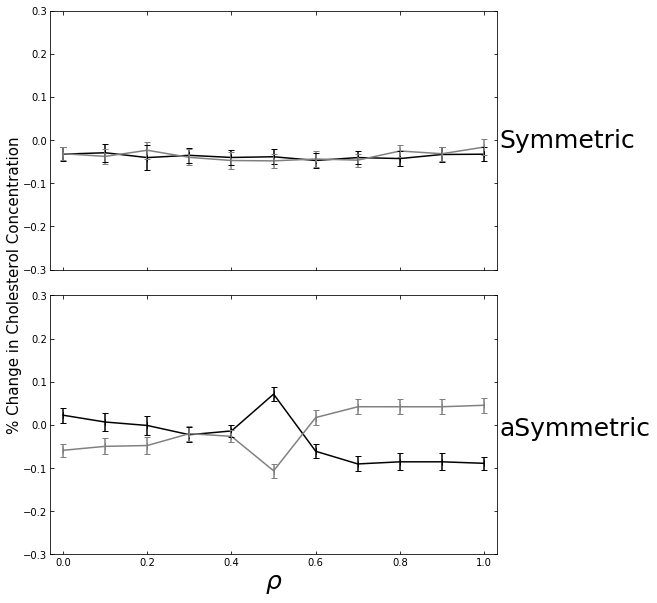

In [29]:
fig,(sym,a_sym) = plt.subplots(nrows=2,sharey=True, sharex=True, figsize=(8,10))

sym.errorbar(sym_cholper_leaflet.Rho_Value,
             sym_cholper_leaflet.Sym_Upper/sym_cholper_leaflet.Sym_Upper_0-1,xerr=0,
             yerr=sym_cholper_leaflet.Sym_Upper_Err/sym_cholper_leaflet.Sym_Upper_0,
             capsize=3,capthick=1,barsabove=True,color='black')
sym.errorbar(sym_cholper_leaflet.Rho_Value,
             sym_cholper_leaflet.Sym_Lower/sym_cholper_leaflet.Sym_Lower_0-1,xerr=0,
             yerr=sym_cholper_leaflet.Sym_Lower_Err/sym_cholper_leaflet.Sym_Lower_0,
             capsize=3,capthick=1,barsabove=True,color='grey')
a_sym.errorbar(asym_cholper_leaflet.Rho_Value,
             asym_cholper_leaflet.ASym_Upper/asym_cholper_leaflet.ASym_Upper_0-1,xerr=0,
             yerr=asym_cholper_leaflet.ASym_Upper_Err/asym_cholper_leaflet.ASym_Upper_0,
             capsize=3,capthick=1,barsabove=True,color='black')
a_sym.errorbar(asym_cholper_leaflet.Rho_Value,
             asym_cholper_leaflet.ASym_Lower/asym_cholper_leaflet.ASym_Lower_0 -1,xerr=0,
             yerr=asym_cholper_leaflet.ASym_Lower_Err/asym_cholper_leaflet.ASym_Lower_0,
             capsize=3,capthick=1,barsabove=True,color='grey')

sym.tick_params(axis='x',direction='in',top=True,bottom=True)
sym.tick_params(axis='y',direction='in',left=True,right=True)
a_sym.tick_params(axis='x',direction='in',top=True,bottom=True)
a_sym.tick_params(axis='y',direction='in',left=True,right=True)



plt.xlim([-.03,1.03])
plt.ylim([-.3,.3])
plt.gcf().text(.905,.7,"Symmetric", va='center',fontsize=25,rotation='horizontal')
plt.gcf().text(.905,.3,"aSymmetric", va='center',fontsize=25,rotation='horizontal')

plt.xlabel(r'$\rho$',fontsize=25)
plt.gcf().text(0.05,0.5,"% Change in Cholesterol Concentration", va='center',fontsize=15,rotation='vertical')
fig.subplots_adjust(hspace=.1)
plt.savefig("Figure_3:%CholperLeaflet.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

In [375]:
pope_SN1_AVG= pd.read_csv("POPE-OP-SN1-AVG-Copy1.txt",sep=",",header=None,dtype=float)

FileNotFoundError: File b'POPE-OP-SN1-AVG-Copy1.txt' does not exist

In [ ]:
pope_SN1_STD= pd.read_csv("POPE-OP-SN1-STD-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
pope_SN2_AVG= pd.read_csv("POPE-OP-SN2-AVG-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
pope_SN2_STD= pd.read_csv("POPE-OP-SN2-STD-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
x = np.arange(0,8,1)
cmap = plt.get_cmap('summer_r')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
colors

fig, (POPE_OP_SN2,POPE_OP_SN1) = plt.subplots(1,2,sharey=True, figsize=(15,5))

for row_index,row in pope_SN2_AVG.iterrows():
    POPE_OP_SN2.errorbar(np.arange(1,14,1),
                 -pope_SN2_AVG.iloc[row_index][1:],xerr=0,
                 yerr=pope_SN2_STD.iloc[row_index][1:],
                 capsize=3,capthick=1,barsabove=True,color=colors[row_index])

x = np.arange(0,8,1)
cmap = plt.get_cmap('summer_r')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
colors
for row_index,row in pope_SN1_AVG.iterrows():
    POPE_OP_SN1.errorbar(np.arange(1,16,1),
                 -pope_SN1_AVG.iloc[row_index][1:],xerr=0,
                 yerr=pope_SN1_STD.iloc[row_index][1:],
                 capsize=3,capthick=1,barsabove=True,color=colors[row_index])

fig.subplots_adjust(wspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
plt.gcf().text(0.5,0,"Carbon Number", ha="center",fontsize=15)
plt.gcf().text(0.07,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.25,.93,"POPE-SN1", va='center',fontsize=25,rotation='horizontal')
plt.gcf().text(.63,.93,"POPE-SN2", va='center',fontsize=25,rotation='horizontal')
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.gca().invert_yaxis()
plt.savefig("POPE-OP.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

In [ ]:
pops_SN1_AVG= pd.read_csv("POPS-SN1-AVG-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
pops_SN1_STD= pd.read_csv("POPS-SN1-STD-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
pops_SN2_AVG= pd.read_csv("POPS-SN2-AVG-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
pops_SN2_STD= pd.read_csv("POPS-SN2-STD-Copy1.txt",sep=",",header=None,dtype=float)

In [ ]:
x = np.arange(0,8,1)
cmap = plt.get_cmap('summer_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors

fig, (POPS_OP_SN1,POPS_OP_SN2) = plt.subplots(1,2,sharey=True, figsize=(15,5))

for row_index,row in pops_SN2_AVG.iterrows():
    POPS_OP_SN2.errorbar(np.arange(1,15,1),
                 -pops_SN2_AVG.iloc[row_index][1:],xerr=0,
                 yerr=pops_SN2_STD.iloc[row_index][1:],
                 capsize=3,capthick=1,barsabove=True,color=colors[row_index])

    
x = np.arange(0,8,1)
cmap = plt.get_cmap('summer_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors
for row_index,row in pops_SN1_AVG.iterrows():
    POPS_OP_SN1.errorbar(np.arange(1,17,1),
                 -pops_SN1_AVG.iloc[row_index][1:],xerr=0,
                 yerr=pops_SN1_STD.iloc[row_index][1:],
                 capsize=3,capthick=1,barsabove=True,color=colors[row_index])

fig.subplots_adjust(wspace=0)
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
plt.gcf().text(0.5,0,"Carbon Number", ha="center",fontsize=15)
plt.gcf().text(0.07,0.5,"-Scd", va='center',fontsize=15,rotation='vertical')
plt.gcf().text(.25,.93,"POPS-SN1", va='center',fontsize=25,rotation='horizontal')
plt.gcf().text(.63,.93,"POPS-SN2", va='center',fontsize=25,rotation='horizontal')
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.gca().invert_yaxis()
plt.savefig("POPS-OP.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

# TILT ANGLE

In [340]:
asym_tiltangle_LO_Avg = pd.read_excel('Asym-TiltAngle-Copy1.xlsx',sheet_name="LO-AVG",dtype=float)
asym_tiltangle_LO_Std = pd.read_excel('Asym-TiltAngle-Copy1.xlsx',sheet_name="LO-STD",dtype=float)
asym_tiltangle_LD_Avg = pd.read_excel('Asym-TiltAngle-Copy1.xlsx',sheet_name="LD-AVG",dtype=float)
asym_tiltangle_LD_Std = pd.read_excel('Asym-TiltAngle-Copy1.xlsx',sheet_name="LD-STD",dtype=float)

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


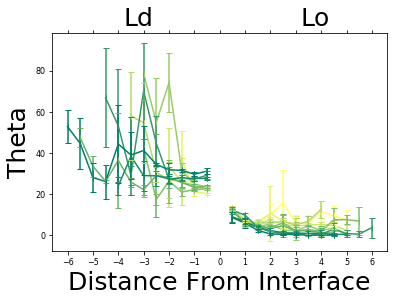

In [350]:
x = np.arange(0,8,1)
cmap = plt.get_cmap('summer_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors

for column in asym_tiltangle_LO_Avg:
    if column != float(.7):
        plt.errorbar(np.arange(0,6.5,.5),
                     asym_tiltangle_LO_Avg[column],xerr=0,
                     yerr=asym_tiltangle_LO_Std[column],
                     capsize=3,capthick=1,barsabove=True,color=colors[int(column*10)])
        
for column in asym_tiltangle_LD_Avg:
    if column != float(.7):
        plt.errorbar(np.arange(0,-6.5,-.5),
                     asym_tiltangle_LD_Avg[column],xerr=0,
                     yerr=asym_tiltangle_LD_Std[column],
                     capsize=3,capthick=1,barsabove=True,color=colors[int(column*10)])
    


#plt.xlim([-.03,1.03])
#plt.ylim([-.3,.3])
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
plt.xticks(np.arange(-6,7,1))
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.xlabel("Distance From Interface",fontsize=25)
plt.ylabel("Theta",fontsize=25)
plt.gcf().text(.29,.93,"Ld", va='center',fontsize=25,rotation='horizontal')
plt.gcf().text(.7,.93,"Lo", va='center',fontsize=25,rotation='horizontal')
plt.savefig("Asym-TitltAnlge.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")

In [345]:
sym_tiltangle_LO_Avg = pd.read_excel('Sym-TiltAngle-Copy1.xlsx',sheet_name="LO-AVG",dtype=float)
sym_tiltangle_LO_Std = pd.read_excel('Sym-TiltAngle-Copy1.xlsx',sheet_name="LO-STD",dtype=float)
sym_tiltangle_LD_Avg = pd.read_excel('Sym-TiltAngle-Copy1.xlsx',sheet_name="LD-AVG",dtype=float)
sym_tiltangle_LD_Std = pd.read_excel('Sym-TiltAngle-Copy1.xlsx',sheet_name="LD-STD",dtype=float)

/Users/naveen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


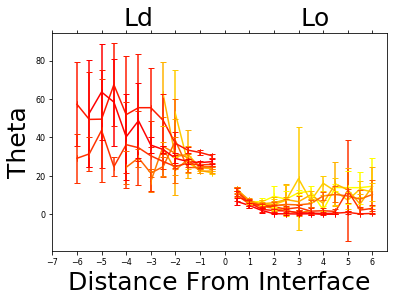

In [351]:
x = np.arange(0,8,1)
cmap = plt.get_cmap('autumn_r')
colors = [cmap(i) for i in np.linspace(0, 1, 11)]
colors

for column in asym_tiltangle_LO_Avg:
    if column != float(.7):
        plt.errorbar(np.arange(0,6.5,.5),
                     sym_tiltangle_LO_Avg[column],xerr=0,
                     yerr=sym_tiltangle_LO_Std[column],
                     capsize=3,capthick=1,barsabove=True,color=colors[int(column*10)])
        
for column in asym_tiltangle_LD_Avg:
    if column != float(.7):
        plt.errorbar(np.arange(0,-6.5,-.5),
                     sym_tiltangle_LD_Avg[column],xerr=0,
                     yerr=sym_tiltangle_LD_Std[column],
                     capsize=3,capthick=1,barsabove=True,color=colors[int(column*10)])
    


#plt.xlim([-.03,1.03])
#plt.ylim([-.3,.3])
plt.rc('font',family='serif',serif='Times')
plt.rc('xtick',labelsize=8)
plt.xticks(np.arange(-7,7,1))
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.xlabel("Distance From Interface",fontsize=25)
plt.ylabel("Theta",fontsize=25)
plt.gcf().text(.29,.93,"Ld", va='center',fontsize=25,rotation='horizontal')
plt.gcf().text(.7,.93,"Lo", va='center',fontsize=25,rotation='horizontal')
plt.savefig("Sym-TiltAngle.pdf", format='pdf',dpi=700,quality=100,bbox_inches="tight")